R2 score: 0.7980716087392067
MSE: 0.00030308590644922295


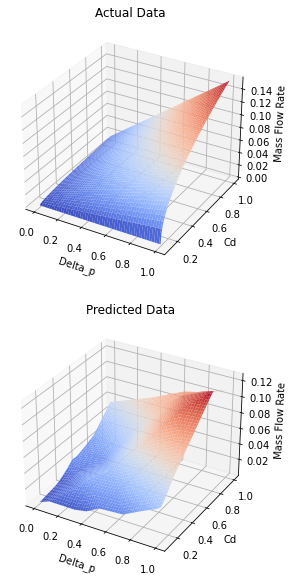

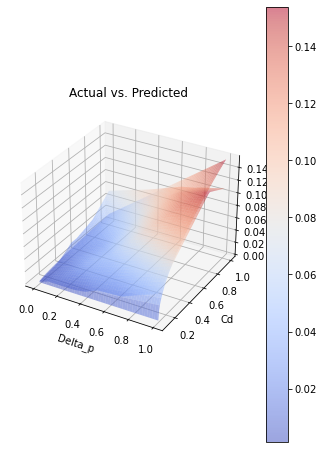

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define constants
density = 1.2
area = 0.1

# Define range of inputs
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0.1, 1, 100)

# Generate data
X = np.array([(p, cd) for p in x1 for cd in x2])
delta_p = X[:, 0]
Cd = X[:, 1]
y = density * area * Cd * np.sqrt(2 * delta_p / density)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Create neural network and train
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)

# Make predictions on testing set
y_pred = mlp.predict(X_test)

# Evaluate model performance
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Reshape the data for surface plot
delta_p_mesh, Cd_mesh = np.meshgrid(x1, x2)
y_actual_mesh = y.reshape((100, 100))
y_pred_mesh = mlp.predict(X).reshape((100, 100))

# Plot actual data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.set_title("Actual Data")
ax.set_xlabel("Delta_p")
ax.set_ylabel("Cd")
ax.set_zlabel("Mass Flow Rate")
ax.plot_surface(delta_p_mesh, Cd_mesh, y_actual_mesh, cmap='coolwarm')

# Plot predicted data
ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.set_title("Predicted Data")
ax.set_xlabel("Delta_p")
ax.set_ylabel("Cd")
ax.set_zlabel("Mass Flow Rate")
ax.plot_surface(delta_p_mesh, Cd_mesh, y_pred_mesh, cmap='coolwarm')

plt.show()
# Plot actual and predicted data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Actual vs. Predicted")
ax.set_xlabel("Delta_p")
ax.set_ylabel("Cd")
ax.set_zlabel("Mass Flow Rate")
ax.plot_surface(delta_p_mesh, Cd_mesh, y_actual_mesh, cmap='coolwarm', alpha=0.5)
ax.plot_surface(delta_p_mesh, Cd_mesh, y_pred_mesh, cmap='coolwarm', alpha=0.5)

# Add colorbar
mappable = ax.collections[0]
plt.colorbar(mappable)

plt.show()
